# Project: Predicting Startup's Acquisition Status
The aim of this project is to predict the startup's acquisition status based on their financial statistics  
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>  
<li><a href="#dataclean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Modeling</a></li>
<li><a href="#eval">Modeling Evaluation</a></li>
<li><a href="#imp">Feature Importance</a></li>
</ul>

<a id='intro'></a>
# Introduction

Founding a startup with a revolutionary idea may seem very attractive to today's generation but having insights and knowledge about the condition of startups founded in the past, can help in shaping future startup idea and positioning it well in today's markets, which can ultimately lead to increasing its performance many folds, in the real world.

#### We want to answer those questions and investiagtion:
* Question 1 : How many startups released over the years? and which year has the most released number of startups?
* Question 2 : What is the number of startups in every country?
* Question 3 : Which startup's category advances faster?
* Question 4 : Who are the top 10 market learder? 
* Companies statues
* Status of Startups in USA, UK, Canada, China

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import joblib
import chardet
# for Box-Cox Transformation
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder
#Importing the models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,  roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
import itertools
from sklearn import metrics
# set seed for reproducibility
np.random.seed(0)
#to suppress un-necessary warnings
import warnings  
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
# Data Wrangling

In [2]:
'''
file_csv = 'companies.csv'
with open(file_csv, 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
# check what the character encoding might be
print(result)
'''

"\nfile_csv = 'companies.csv'\nwith open(file_csv, 'rb') as rawdata:\n    result = chardet.detect(rawdata.read())\n# check what the character encoding might be\nprint(result)\n"

#### Gathering data from csv file

In [3]:
df=pd.read_csv("companies.csv", index_col=False, encoding="utf-8")
#"ISO-8859-1"

In [4]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [5]:
df.drop(['id','Unnamed: 0.1','parent_id', 'permalink', 'logo_width', 'logo_height','logo_url', 'name', 'city',
         'invested_companies','twitter_username', 'short_description', 'description', 'homepage_url', 
         'domain','overview', 'entity_id', 'tag_list', 'last_funding_at', 'updated_at', 'relationships', 
         'entity_type','created_at', 'created_by', 'region', 'ROI', 'normalized_name',
         'first_investment_at', 'last_investment_at'],
         axis=1, inplace=True)
df

,category_code,status,founded_at,closed_at,country_code,state_code,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,lat,lng
0,web,operating,2005-10-17,NaN,USA,WA,NaN,2005-10-01,3.0,39750000.0,2010-09-05,2013-09-18,5.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,CA,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,CA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,CA,NaN,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,VA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.052234,-118.243685


#### Assessing data

In [6]:
df.shape

(196553, 15)

In [7]:
df.isnull().sum()

category_code          73367
status                     0
founded_at            105326
closed_at             193933
country_code          108563
state_code            145650
investment_rounds     193962
first_funding_at      165046
funding_rounds        164846
funding_total_usd     168679
first_milestone_at    104854
last_milestone_at     104854
milestones            104854
lat                   112701
lng                   112701
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   category_code       123186 non-null  object 
 1   status              196553 non-null  object 
 2   founded_at          91227 non-null   object 
 3   closed_at           2620 non-null    object 
 4   country_code        87990 non-null   object 
 5   state_code          50903 non-null   object 
 6   investment_rounds   2591 non-null    float64
 7   first_funding_at    31507 non-null   object 
 8   funding_rounds      31707 non-null   float64
 9   funding_total_usd   27874 non-null   float64
 10  first_milestone_at  91699 non-null   object 
 11  last_milestone_at   91699 non-null   object 
 12  milestones          91699 non-null   float64
 13  lat                 83852 non-null   float64
 14  lng                 83852 non-null   float64
dtypes: float64(6), object(9)
memory us

In [9]:
numeric_ = df.select_dtypes(exclude=['object']).copy()
numeric_.columns

Index(['investment_rounds', 'funding_rounds', 'funding_total_usd',
       'milestones', 'lat', 'lng'],
      dtype='object')

In [10]:
cat_ = df.select_dtypes(include=['object']).copy()
cat_.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'state_code', 'first_funding_at', 'first_milestone_at',
       'last_milestone_at'],
      dtype='object')

### Univariate Analysis

#### Numeric Features

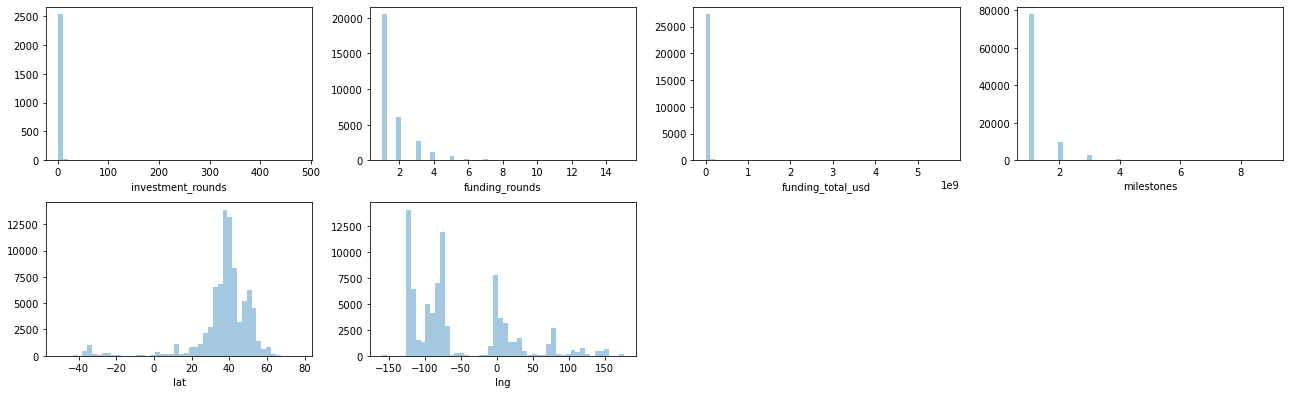

In [11]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(numeric_):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

Values with almost one value as seen from the plots
* investments_rounds
* active_days
* milestones

and other features are highly skewed in the distribution which doesn't really add infromation for prediction

#### Boxplot for outliers

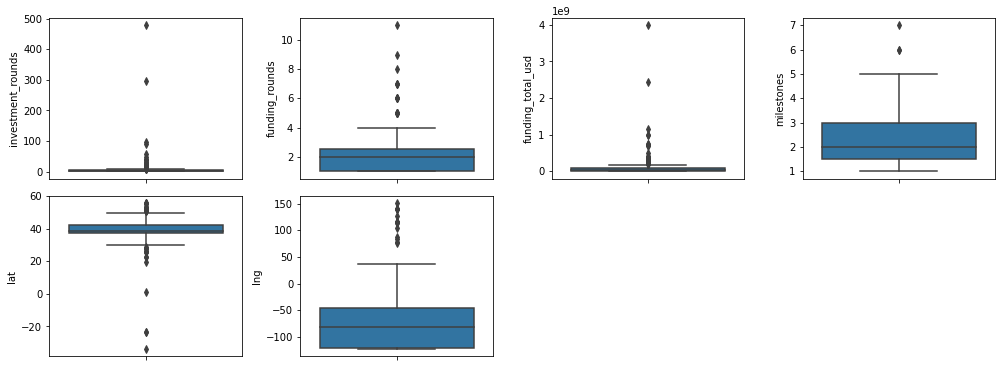

In [12]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(numeric_):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

#### Categorical features

In [13]:
'''
fig = plt.figure(figsize=(25,25))
for index in range(len(cat_.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=cat_.iloc[:,index], data=cat_.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)
'''

'\nfig = plt.figure(figsize=(25,25))\nfor index in range(len(cat_.columns)):\n    plt.subplot(9,5,index+1)\n    sns.countplot(x=cat_.iloc[:,index], data=cat_.dropna())\n    plt.xticks(rotation=90)\nfig.tight_layout(pad=1.0)\n'

Univariate Analysis helps us to understand all the features better, on an individual scale. To further deepen our insights and uncover potential pattern in the data, we will also need to find out more about the relationship between all these features with one another, which brings us to our next step in our analysis - Bivariate Analysis

#### Bi-Variate Analysis

Bi-variate analysis looks at 2 different features to identify any possible relationship or distinctive patterns between the 2 features. One of the commonly used technique is through the Correlation Matrix. Correlation matrix is an effective tool to uncover linear relationship (Correlation) between any 2 continuous features

<AxesSubplot:>

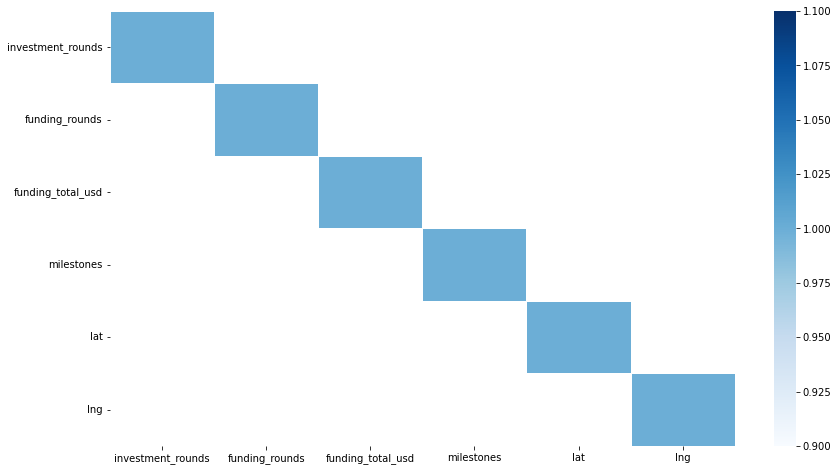

In [14]:
plt.figure(figsize=(14,8))
correlation = numeric_.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

There is no strong correlation between the variables

<a id='dataclean'></a>
# Data Cleaning

#### Dropping duplicated rows from the dataframe

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(103646, 15)

#### Dropping Closed_at which came before Founded_at dates

In [16]:
df.reset_index(inplace=True)
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
for i, (closed, founded) in enumerate(zip(df['closed_at'], df['founded_at'])):
    if closed is np.nan or founded is np.nan:
        continue
    else:
        if closed > founded:
            #REPLACING WITH EACH OTHER
            #tmp = pd.to_datetime(closed)
            #df['closed_at'].replace(to_replace=closed, value=pd.to_datetime(founded), inplace=True)
            #df['founded_at'].replace(to_replace=founded, value=tmp, inplace=True)
         
            #DROPPING THE ROW 
            df.drop(labels=i, axis=0, inplace=True)

In [17]:
df.shape

(101692, 16)

In [18]:
df

,index,category_code,status,founded_at,closed_at,country_code,state_code,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,lat,lng
0,0,web,operating,2005-10-17,NaT,USA,WA,NaN,2005-10-01,3.0,39750000.0,2010-09-05,2013-09-18,5.0,47.606209,-122.332071
1,1,games_video,acquired,NaT,NaT,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.021122,-118.396467
2,2,games_video,acquired,NaT,NaT,USA,CA,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,37.562992,-122.325525
3,3,network_hosting,operating,2008-07-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,games_video,operating,2008-07-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103641,196548,ecommerce,operating,2007-01-01,NaT,USA,CA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,37.774929,-122.419415
103642,196549,public_relations,operating,2007-11-01,NaT,USA,CA,NaN,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,37.338208,-121.886329
103643,196550,consulting,operating,1959-01-01,NaT,USA,VA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,38.882334,-77.171091
103644,196551,search,operating,2008-07-01,NaT,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.052234,-118.243685


In [19]:
df.isnull().sum()

index                      0
category_code           9349
status                     0
founded_at             23195
closed_at             101029
country_code           20179
state_code             54397
investment_rounds     100192
first_funding_at       71738
funding_rounds         71591
funding_total_usd      75154
first_milestone_at     49184
last_milestone_at      49184
milestones             49184
lat                    23587
lng                    23587
dtype: int64

#### Fill missing values with the most repetitive value or dropping null values

In [20]:
df.drop(['index'], axis=1, inplace=True)
df['category_code'].fillna('software', inplace=True)

#df['lng'].fillna(-74.005973, inplace=True)
#df['lat'].fillna(40.712775, inplace=True)
df.dropna(how='any', subset=['lng', 'lat'], axis=0, inplace=True)

df['milestones'].fillna(1.0, inplace=True)

#df['funding_total_usd'].fillna(df['funding_total_usd'].mean(), inplace=True) #filled with the mean
df.dropna(how='any', subset=['funding_total_usd'], axis=0, inplace=True)


df['investment_rounds'].fillna(1.0, inplace=True)

#df['funding_rounds'].fillna(2.0, inplace=True) >> try it later fill with second repetitive value 
#number of rows before dropping the missing values of funding rounds was 90336
df.dropna(how='any', subset=['funding_rounds'], axis=0, inplace=True)

#df.dropna(how='any', subset=['first_funding_at'], axis=0, inplace=True)

df.dropna(how='any', subset=['founded_at'], axis=0, inplace=True)
df['founded_at'].fillna('2011-01-01', inplace=True)
df['founded_at'] = pd.to_datetime(df['founded_at'])

for st, closed in zip(df['status'], df['closed_at']):
    if closed is pd.NaT:   #pd.NaT if used after converting the column to datetime format
        if st  == 'operating' or st == 'ipo':
            df.closed_at.replace(to_replace=closed, value=1, inplace=True)

            
df['country_code'].fillna('USA', inplace=True)
df['state_code'].fillna('CA', inplace=True)

#### Removing outliers in funding_total_usd and funding rounds columns

In [21]:
def remove_outliers(df, string_):
    #Remove the outliers
    mean = df[string_].mean()
    std = df[string_].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    outliers = df[(df[string_] < lower) | (df[string_] > upper)]
    print(f"Orginal Dataset size: {df.shape}")
    df.drop(outliers.index.to_list(), inplace=True)
    print(f"Number of outliers: {len(outliers)}")

In [22]:
remove_outliers(df, 'funding_rounds')
remove_outliers(df, 'funding_total_usd')

Orginal Dataset size: (19210, 15)
Number of outliers: 273
Orginal Dataset size: (18937, 15)
Number of outliers: 124


In [23]:
df

,category_code,status,founded_at,closed_at,country_code,state_code,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,lat,lng
0,web,operating,2005-10-17,1,USA,WA,1.0,2005-10-01,3.0,39750000.0,2010-09-05,2013-09-18,5.0,47.606209,-122.332071
13,web,acquired,2007-10-01,1,USA,CA,1.0,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,37.386052,-122.083851
19,health,operating,2007-10-01,1,USA,CA,1.0,2008-10-10,5.0,68069200.0,NaN,NaN,1.0,37.774929,-122.419415
20,cleantech,operating,2003-01-01,1,USA,TX,1.0,2011-03-08,3.0,10125293.0,2010-01-01,2010-01-01,1.0,30.267153,-97.743061
24,analytics,operating,2006-01-01,1,USA,CA,1.0,2008-08-25,3.0,33000000.0,2010-05-18,2013-03-01,3.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103623,software,operating,2007-01-01,1,USA,CA,1.0,2009-06-01,5.0,82500000.0,2011-07-01,2013-12-11,3.0,37.774929,-122.419415
103626,web,operating,2007-09-15,1,BRB,CA,1.0,2008-02-10,1.0,798679.0,2008-01-15,2008-11-12,3.0,13.113222,-59.598809
103631,social,operating,2011-01-11,1,CAN,CA,1.0,2011-09-06,1.0,500000.0,2011-01-11,2011-01-11,1.0,28.805267,-97.003598
103642,public_relations,operating,2007-11-01,1,USA,CA,1.0,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,37.338208,-121.886329


#### Create Active days column 

In [24]:
active_days_list = []
for cls, fnd in zip(df['closed_at'], df['founded_at']):
    if cls != 1:
        dt_cls = pd.to_datetime(cls)
        active_days_list.append((dt_cls.year - fnd.year)*365)
    elif cls == 1:
        active_days_list.append((fnd.year - cls)*365)
df['active_days'] = active_days_list

In [25]:
len(active_days_list)

18813

In [26]:
df.shape

(18813, 16)

In [27]:
df.drop(['founded_at', 'closed_at'], axis=1, inplace=True)

#### Create new column from last_milestone and first_milstone columns 

In [28]:
#make sure that the last milestone is bigger than first milestone (inconsistency)

In [29]:
milstones_list = []
df['first_milestone_at'] = pd.to_datetime(df['first_milestone_at'])
df['first_milestone_at'].fillna(df.first_milestone_at.mean(), inplace=True)

df['last_milestone_at'] = pd.to_datetime(df['last_milestone_at'])
df['last_milestone_at'].fillna(df.last_milestone_at.mean(), inplace=True)

for first, last, mile in zip(df['first_milestone_at'], df['last_milestone_at'], df['milestones']):
    milstones_list.append(((last.year - first.year)*365) / mile)
    
#measured days wise 
df['milestone_adv_ratio'] = milstones_list

In [30]:
df.drop(['first_milestone_at', 'last_milestone_at'], axis=1, inplace=True)

#### Fixing data typos

In [31]:
df.first_funding_at = pd.to_datetime(df.first_funding_at)
df.first_funding_at.fillna(df.first_funding_at.mean(), inplace=True)

In [32]:
df['funded_at_day'] = df['first_funding_at'].dt.day
df['funded_at_month'] = df['first_funding_at'].dt.month
df['funded_at_year'] = df['first_funding_at'].dt.year
df.drop(['first_funding_at'], axis=1, inplace=True)

#### Shuffling the data

In [33]:
final_df = df.sample(frac=1)
final_df

,category_code,status,country_code,state_code,investment_rounds,funding_rounds,funding_total_usd,milestones,lat,lng,active_days,milestone_adv_ratio,funded_at_day,funded_at_month,funded_at_year
83567,software,acquired,DEU,CA,1.0,1.0,10354400.0,1.0,48.135125,11.581981,729270,0.0,13,1,2008
24054,social,operating,USA,NY,1.0,2.0,12000000.0,2.0,40.712775,-74.005973,734015,182.5,16,10,2012
93156,enterprise,acquired,USA,RI,1.0,2.0,5800000.0,2.0,41.823989,-71.412834,733285,365.0,3,11,2011
63434,health,operating,USA,LA,1.0,1.0,482452.0,1.0,30.458283,-91.140320,730365,365.0,7,2,2011
1462,consulting,operating,USA,MA,1.0,2.0,11000000.0,1.0,38.978754,-94.567349,731825,0.0,19,9,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53784,medical,operating,USA,IN,1.0,1.0,950000.0,1.0,39.768403,-86.158068,732920,365.0,6,1,2012
73773,education,operating,USA,CA,1.0,2.0,7500000.0,2.0,37.441883,-122.143019,732920,365.0,6,7,2011
56774,advertising,operating,USA,IL,1.0,1.0,5000000.0,1.0,42.110304,-88.034240,731825,365.0,30,10,2013
62806,software,operating,GBR,CA,1.0,1.0,113644.0,1.0,55.864237,-4.251806,734380,365.0,21,11,2013


In [34]:
final_df.dtypes

category_code           object
status                  object
country_code            object
state_code              object
investment_rounds      float64
funding_rounds         float64
funding_total_usd      float64
milestones             float64
lat                    float64
lng                    float64
active_days              int64
milestone_adv_ratio    float64
funded_at_day            int64
funded_at_month          int64
funded_at_year           int64
dtype: object

In [35]:
final_df.isnull().sum()

category_code          0
status                 0
country_code           0
state_code             0
investment_rounds      0
funding_rounds         0
funding_total_usd      0
milestones             0
lat                    0
lng                    0
active_days            0
milestone_adv_ratio    0
funded_at_day          0
funded_at_month        0
funded_at_year         0
dtype: int64

In [36]:
final_df.shape

(18813, 15)

In [37]:
final_df.describe()

,investment_rounds,funding_rounds,funding_total_usd,milestones,lat,lng,active_days,milestone_adv_ratio,funded_at_day,funded_at_month,funded_at_year
count,18813.000000,18813.000000,1.881300e+04,18813.000000,18813.000000,18813.000000,18813.000000,18813.000000,18813.000000,18813.000000,18813.000000
mean,1.079147,1.806517,1.149522e+07,1.426141,38.609253,-66.991713,731228.695583,215.789648,12.031946,6.117897,2010.023866
std,4.286723,1.134242,2.232543e+07,0.774577,12.706117,62.063558,23412.032770,245.993355,9.823316,3.523685,2.679415
min,1.000000,1.000000,2.910000e+02,1.000000,-42.883611,-158.056896,-3650.000000,0.000000,1.000000,1.000000,1984.000000
25%,1.000000,1.000000,5.520000e+05,1.000000,36.162664,-118.608975,731095.000000,0.000000,1.000000,3.000000,2008.000000
50%,1.000000,1.000000,2.750000e+06,1.000000,39.103118,-81.778697,732555.000000,182.500000,11.000000,6.000000,2011.000000
75%,1.000000,2.000000,1.151000e+07,2.000000,43.182840,-6.260310,733650.000000,365.000000,20.000000,9.000000,2012.000000
max,478.000000,6.000000,2.031167e+08,9.000000,70.919200,174.811945,734745.000000,5292.500000,31.000000,12.000000,2013.000000


<a id='eda'></a>
# Exploratory Data Analysis 

In [38]:
cp_df = final_df.copy()

In [39]:
#pd.plotting.scatter_matrix(cp_df, alpha=0.2, figsize=(30,30), grid=True);

### Research Question 1 : How many startups was funded over the years? and which year has the most funded number of startups?

In [40]:
cp_df.funded_at_year.value_counts().idxmax()

2013

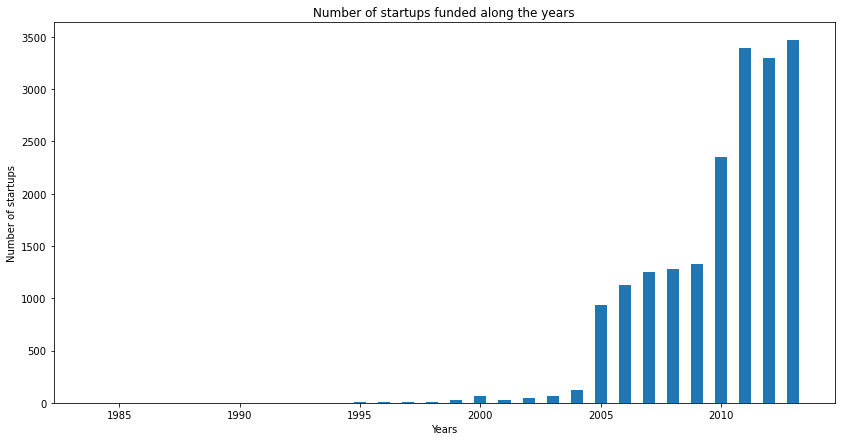

In [41]:
years = cp_df.funded_at_year.value_counts().index.tolist()
number_of_startups_released = cp_df.funded_at_year.value_counts().tolist()
plt.figure(figsize=(14, 7))
plt.title("Number of startups funded along the years")
plt.xlabel('Years')
plt.ylabel("Number of startups")
plt.bar(x=years, height=number_of_startups_released, width=0.5);

### Research Question 2: What is the number of startups in every country?

In [42]:
cp_df.country_code.value_counts()

USA    13367
GBR     1046
CAN      597
FRA      415
ISR      310
       ...  
SLV        1
MCO        1
UMI        1
MMR        1
NPL        1
Name: country_code, Length: 105, dtype: int64

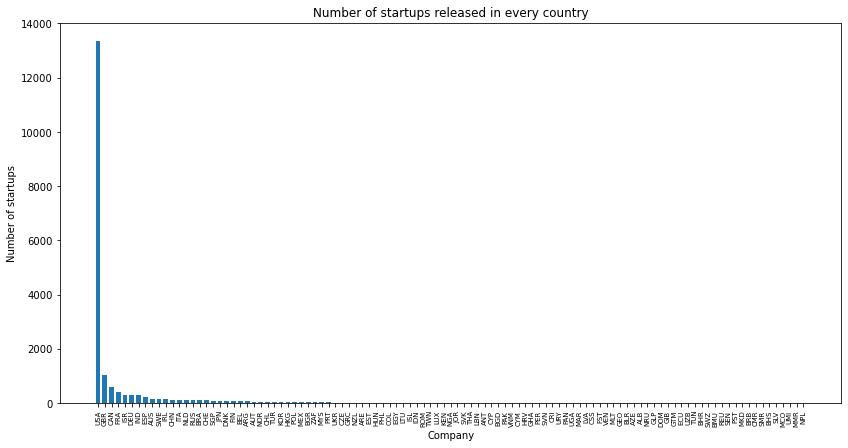

In [43]:
countries = cp_df.country_code.value_counts().index.tolist()
number_of_startups_released = cp_df.country_code.value_counts().tolist()
plt.figure(figsize=(14, 7))
plt.title("Number of startups released in every country")
plt.xlabel('Company')
plt.ylabel("Number of startups")
plt.xticks(rotation=90, fontsize=7)
plt.bar(x=countries, height=number_of_startups_released, width=0.7);


[Text(1, 0, 'acquired'),
 Text(2, 0, 'operating'),
 Text(3, 0, 'ipo'),
 Text(4, 0, 'closed')]

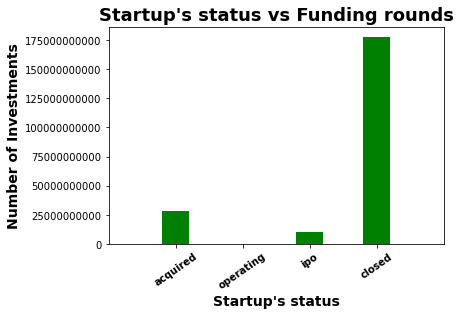

In [44]:
# x axis for funding_average_per_type_bar_chart 
funding_types = cp_df["status"].unique()
#y axis
fund_dup = np.array(cp_df.groupby('status')["funding_total_usd"].sum())

fig = plt.figure()
ax = fig.add_subplot(111)

x_axis = np.arange(1, len(funding_types)+1)
xtick_locations = [x for x in x_axis]

ax.set_title("Startup's status vs Funding rounds", weight='bold').set_fontsize('18')
ax.set_xlabel("Startup's status", weight='bold').set_fontsize('14')
ax.set_ylabel("Number of Investments", weight='bold').set_fontsize('14')

ax.set_xlim(0, len(funding_types) +1)

plt.ticklabel_format(style = 'plain')

ax.bar(x_axis, fund_dup, facecolor="green", width=.4)
ax.set_xticks(xtick_locations)

ax.set_xticklabels(funding_types, rotation=35, weight='bold')

### Research question 3: Which startup's category advances faster?

In [45]:
adv_df = cp_df.groupby('category_code').mean()['milestone_adv_ratio']
adv_df

category_code
advertising         191.730135
analytics           176.729249
automotive          202.387821
biotech             287.191495
cleantech           245.009843
consulting          220.254296
design               99.135802
ecommerce           179.948925
education           174.289366
enterprise          179.633176
fashion             161.065436
finance             193.592008
games_video         219.546549
government          273.750000
hardware            263.931962
health              253.446875
hospitality         216.255081
legal               219.000000
local               248.863636
manufacturing       278.994253
medical             249.540816
messaging           183.087356
mobile              187.784194
music               188.583333
nanotech            259.342105
network_hosting     267.873583
news                190.379593
nonprofit           188.030303
other               207.860923
pets                178.697917
photo_video         188.517210
public_relations    183.4

In [46]:
cat_code_col= adv_df.index.tolist()
advance_ratio = adv_df.values.tolist()

In [47]:
adv_df.idxmax()

'biotech'

Biotech advances faster than rest of categories

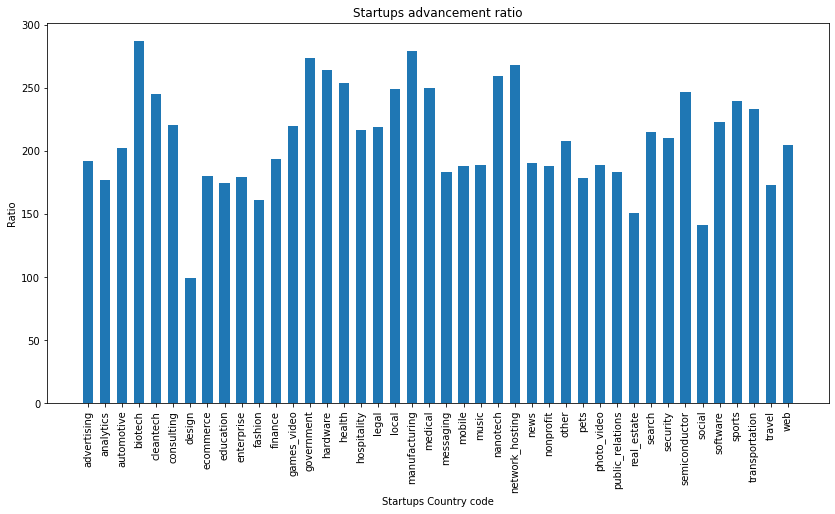

In [48]:
plt.figure(figsize=(14, 7))
plt.title("Startups advancement ratio")
plt.xlabel('Startups Country code')
plt.ylabel("Ratio")
plt.xticks(rotation=90, fontsize = 10)
plt.bar(x=cat_code_col, height=advance_ratio, width=0.6);

### Research Question 4: Who are the top 10 market learder?

In [49]:
final_df.category_code.value_counts()

software            3538
biotech             1799
web                 1554
mobile              1355
enterprise          1178
ecommerce            961
advertising          839
games_video          768
hardware             632
cleantech            508
analytics            506
health               400
medical              392
social               375
education            326
finance              317
other                296
network_hosting      294
semiconductor        284
security             272
public_relations     214
search               197
consulting           194
manufacturing        174
hospitality          164
fashion              149
travel               148
messaging            145
news                 127
music                124
real_estate           96
photo_video           92
sports                78
nonprofit             66
automotive            52
transportation        51
legal                 41
nanotech              38
design                27
local                 22


In [50]:
cat_names = final_df.category_code.value_counts().index[:10]
cat_values = final_df.category_code.value_counts().values[:10]

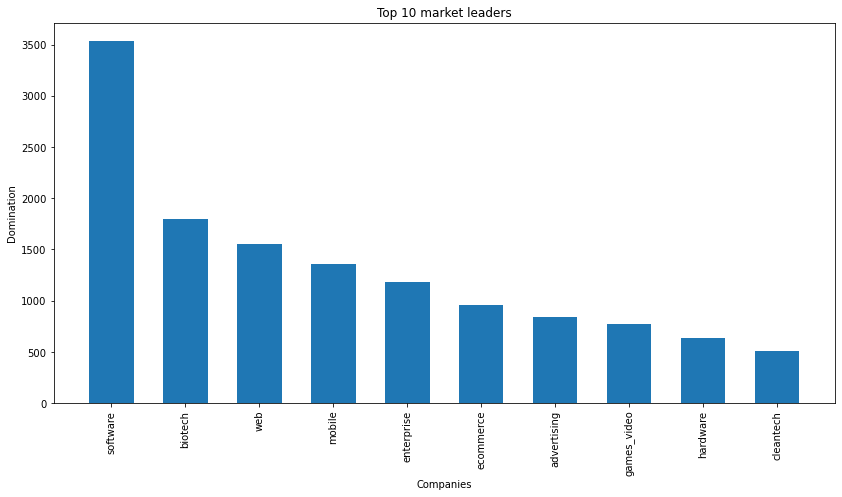

In [51]:
plt.figure(figsize=(14, 7))
plt.title("Top 10 market leaders")
plt.xlabel('Companies')
plt.ylabel("Domination")
plt.xticks(rotation=90, fontsize = 10)
plt.bar(x=cat_names, height=cat_values, width=0.6);

In [52]:
final_df.category_code.value_counts().index[0]

'software'

### Companies Status

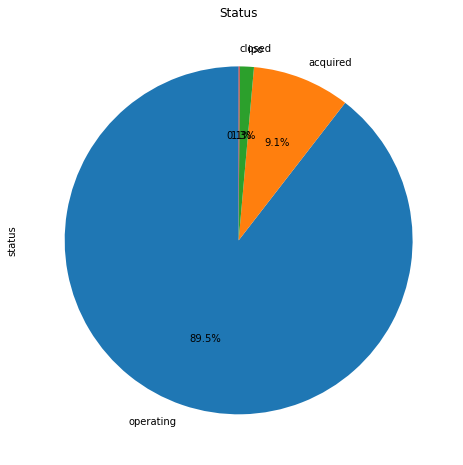

In [53]:
plt.figure(figsize = (8,8))
final_df.status.value_counts().plot(kind='pie',
                                    #explode=(0, 0, 0.15), 
                                    startangle=90,
                                    autopct='%1.1f%%')
plt.title('Status')
plt.show()

### Status of Startups in USA, UK, Canada, China

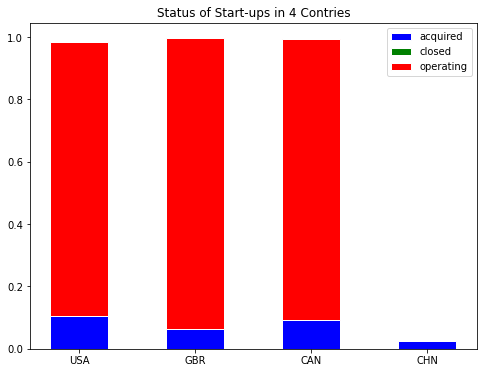

In [54]:
plt.figure(figsize=(8,6))
status_cont=final_df.groupby('country_code')['status'].value_counts(normalize=True)
cont=['USA','GBR','CAN','CHN']
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc['acquired'],color='b',
        label='acquired',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc['closed'],
        bottom=status_cont.loc['acquired'],
        color='g',label='closed',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc['operating'],
        bottom=status_cont.loc['closed']+status_cont.loc['acquired'],
        color='r',
        label='operating',width=0.5,edgecolor='w')
plt.legend()
plt.title('Status of Start-ups in 4 Contries')
plt.show()

## Feature Engineering

### Log Transform

* "Reshaping" of a feature through powers or logarithms. The distribution of some features is skewed, for instance. In this case the logarithm is effective at normalizing it:

In [55]:
def plotting_logtransform(df, col_name):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    sns.kdeplot(df[col_name], shade=True, ax=axs[0])
    sns.kdeplot(np.log(df[col_name]), shade=True, ax=axs[1]);

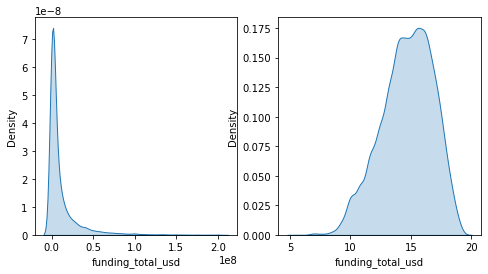

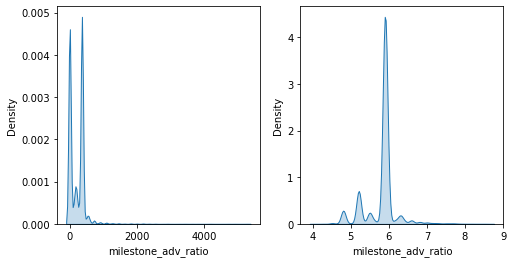

In [56]:
# Plot a comparison
plotting_logtransform(final_df, 'funding_total_usd')
plotting_logtransform(final_df, 'milestone_adv_ratio')

In [57]:
final_df['funding_total_usd'] = np.log(final_df['funding_total_usd'])
final_df['milestone_adv_ratio'] = np.log1p(final_df['milestone_adv_ratio'])
final_df

,category_code,status,country_code,state_code,investment_rounds,funding_rounds,funding_total_usd,milestones,lat,lng,active_days,milestone_adv_ratio,funded_at_day,funded_at_month,funded_at_year
83567,software,acquired,DEU,CA,1.0,1.0,16.152922,1.0,48.135125,11.581981,729270,0.000000,13,1,2008
24054,social,operating,USA,NY,1.0,2.0,16.300417,2.0,40.712775,-74.005973,734015,5.212215,16,10,2012
93156,enterprise,acquired,USA,RI,1.0,2.0,15.573368,2.0,41.823989,-71.412834,733285,5.902633,3,11,2011
63434,health,operating,USA,LA,1.0,1.0,13.086637,1.0,30.458283,-91.140320,730365,5.902633,7,2,2011
1462,consulting,operating,USA,MA,1.0,2.0,16.213406,1.0,38.978754,-94.567349,731825,0.000000,19,9,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53784,medical,operating,USA,IN,1.0,1.0,13.764217,1.0,39.768403,-86.158068,732920,5.902633,6,1,2012
73773,education,operating,USA,CA,1.0,2.0,15.830414,2.0,37.441883,-122.143019,732920,5.902633,6,7,2011
56774,advertising,operating,USA,IL,1.0,1.0,15.424948,1.0,42.110304,-88.034240,731825,5.902633,30,10,2013
62806,software,operating,GBR,CA,1.0,1.0,11.640826,1.0,55.864237,-4.251806,734380,5.902633,21,11,2013


In [58]:
final_df.status.value_counts()

operating    16840
acquired      1708
ipo            247
closed          18
Name: status, dtype: int64

### Label Encoding for categorical features

### One Hot Encoding

In [59]:
object_cols = ['category_code', 'country_code', 'state_code']
d = pd.get_dummies(final_df[object_cols], drop_first=True)
d.shape

(18813, 195)

In [60]:
final_df = final_df.join(d)
final_df.drop(['category_code', 'country_code', 'state_code'], axis=1, inplace=True)
final_df

,status,investment_rounds,funding_rounds,funding_total_usd,milestones,lat,lng,active_days,milestone_adv_ratio,funded_at_day,...,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY
83567,acquired,1.0,1.0,16.152922,1.0,48.135125,11.581981,729270,0.000000,13,...,0,0,0,0,0,0,0,0,0,0
24054,operating,1.0,2.0,16.300417,2.0,40.712775,-74.005973,734015,5.212215,16,...,0,0,0,0,0,0,0,0,0,0
93156,acquired,1.0,2.0,15.573368,2.0,41.823989,-71.412834,733285,5.902633,3,...,0,0,0,0,0,0,0,0,0,0
63434,operating,1.0,1.0,13.086637,1.0,30.458283,-91.140320,730365,5.902633,7,...,0,0,0,0,0,0,0,0,0,0
1462,operating,1.0,2.0,16.213406,1.0,38.978754,-94.567349,731825,0.000000,19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53784,operating,1.0,1.0,13.764217,1.0,39.768403,-86.158068,732920,5.902633,6,...,0,0,0,0,0,0,0,0,0,0
73773,operating,1.0,2.0,15.830414,2.0,37.441883,-122.143019,732920,5.902633,6,...,0,0,0,0,0,0,0,0,0,0
56774,operating,1.0,1.0,15.424948,1.0,42.110304,-88.034240,731825,5.902633,30,...,0,0,0,0,0,0,0,0,0,0
62806,operating,1.0,1.0,11.640826,1.0,55.864237,-4.251806,734380,5.902633,21,...,0,0,0,0,0,0,0,0,0,0


### Standard Scaler

In [61]:
num_cols = ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 'lat', 'lng', 
            'active_days', 'milestone_adv_ratio', 'funded_at_day', 'funded_at_month', 'funded_at_year']
#finaldf = np.asarray(final_df[num_cols])
scaler = StandardScaler()
'''
for col in num_cols:
    scaled_col = scaler.fit_transform(np.asaray(df[col]))
    '''
final_df[num_cols] = scaler.fit_transform(final_df[num_cols].values)

In [62]:
final_df

,status,investment_rounds,funding_rounds,funding_total_usd,milestones,lat,lng,active_days,milestone_adv_ratio,funded_at_day,...,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY
83567,acquired,-0.018464,-0.711081,0.705467,-0.550175,0.749727,1.266053,-0.083664,-1.202211,0.098549,...,0,0,0,0,0,0,0,0,0,0
24054,operating,-0.018464,0.170588,0.774730,0.740887,0.165556,-0.113020,0.119015,0.614589,0.403953,...,0,0,0,0,0,0,0,0,0,0
93156,acquired,-0.018464,0.170588,0.433313,0.740887,0.253014,-0.071237,0.087833,0.855246,-0.919464,...,0,0,0,0,0,0,0,0,0,0
63434,operating,-0.018464,-0.711081,-0.734440,-0.550175,-0.641517,-0.389105,-0.036892,0.855246,-0.512259,...,0,0,0,0,0,0,0,0,0,0
1462,operating,-0.018464,0.170588,0.733870,-0.550175,0.029081,-0.444325,0.025471,-1.202211,0.709357,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53784,operating,-0.018464,-0.711081,-0.416253,-0.550175,0.091230,-0.308826,0.072243,0.855246,-0.614060,...,0,0,0,0,0,0,0,0,0,0
73773,operating,-0.018464,0.170588,0.554019,0.740887,-0.091877,-0.888650,0.072243,0.855246,-0.614060,...,0,0,0,0,0,0,0,0,0,0
56774,operating,-0.018464,-0.711081,0.363615,-0.550175,0.275548,-0.339057,0.025471,0.855246,1.829172,...,0,0,0,0,0,0,0,0,0,0
62806,operating,-0.018464,-0.711081,-1.413383,-0.550175,1.358042,1.010925,0.134605,0.855246,0.912960,...,0,0,0,0,0,0,0,0,0,0


<a id='model'></a>
# Modeling

* Random Forest tuned with GridSearchCV
* Random Forest tuned with RandomizedSearchCV
* XGboost tuned with Optuna

And Finally Ensembling between the three models using VotingEnsemble technique 

In [2]:
DF=pd.read_csv('CleanedData.csv', index_col=False) 
DF

,Unnamed: 0,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,5,1,2007,5.0,125371133.0,1.0,2.0,30.427755,-9.598107,1,...,0,0,0,0,0,0,0,0,0,1
1,6,1,2008,5.0,125371133.0,1.0,4.0,22.307159,73.181219,1,...,0,0,0,0,1,0,0,0,0,0
2,12,1,2008,5.0,125371133.0,1.0,2.0,35.686975,-105.937799,1,...,0,0,0,0,0,0,0,0,1,0
3,15,1,2008,5.0,125371133.0,1.0,3.0,33.078655,-116.601964,1,...,0,0,0,0,0,0,0,0,1,0
4,19,1,2007,5.0,68069200.0,1.0,14.0,37.774929,-122.419415,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,11473,1,2011,5.0,125371133.0,1.0,2.0,37.368830,-122.036350,1,...,0,0,0,0,0,0,0,0,1,0
3493,11475,1,2011,5.0,125371133.0,2.0,8.0,42.387597,-71.099497,1,...,0,0,0,0,0,0,0,0,1,0
3494,11477,1,2010,5.0,125371133.0,1.0,1.0,53.557378,-0.029435,1,...,0,0,0,1,0,0,0,0,0,0
3495,11480,1,2011,5.0,125371133.0,1.0,1.0,11.016844,76.955832,1,...,0,0,0,0,1,0,0,0,0,0


In [3]:
DF.columns

Index(['Unnamed: 0', 'status', 'founded_at', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng',
       'isClosed', 'active_days', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_games_video', 'category_code_hardware',
       'category_code_mobile', 'category_code_network_hosting',
       'category_code_other', 'category_code_public_relations',
       'category_code_search', 'category_code_software', 'category_code_web',
       'country_code_BRA', 'country_code_CAN', 'country_code_DEU',
       'country_code_ESP', 'country_code_FRA', 'country_code_GBR',
       'country_code_IND', 'country_code_IRL', 'country_code_ISR',
       'country_code_NLD', 'country_code_USA', 'country_code_other'],
      dtype='object')

In [4]:
DF.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
DF.status.value_counts()

1    3245
2     191
3      36
4      25
Name: status, dtype: int64

In [6]:
num_cols = ['founded_at','funding_rounds', 'funding_total_usd', 
            'milestones', 'lat', 'lng', 'relationships', 'active_days']
scaler = StandardScaler()
DF[num_cols] = scaler.fit_transform(DF[num_cols].values)

In [7]:
target = DF.status
DF.drop(['status'], axis=1, inplace=True)

In [8]:
def cross_validation_func(df, mytarget, num_splits):
    '''
    Input:
        df: the dataframe
        mytarget: target column
        num_splits: number of folds
    Output:
        it returns two dataframes and two target columns for train and test
    '''
    # Setting up fold parameters
    splits = num_splits
    kf = KFold(n_splits=splits, shuffle=True, random_state=42)
    #Generating folds and making training and prediction for each of N folds
    for train_index, test_index in kf.split(df, mytarget):
        X_train, X_test = df.iloc[list(train_index)], df.iloc[list(test_index)]
        y_train, y_test = mytarget[list(train_index)], mytarget[list(test_index)]
    return X_train, y_train, X_test, y_test

In [9]:
#X_train,X_valid, y_train, y_valid = train_test_split(DF, target, test_size=0.20, 
#random_state=42, shuffle=True)
X_train, y_train, X_test, y_test = cross_validation_func(DF, target, 5)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2798, 35), (699, 35), (2798,), (699,))

In [11]:
X_train

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,active_days,category_code_biotech,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,0.254864,-0.036208,-0.009644,-0.342122,-0.120402,-0.356224,0.478910,1,-0.558943,0,...,0,0,0,0,0,0,0,0,0,1
2,0.359829,-0.036208,-0.009644,-0.342122,-0.120402,-0.049328,-0.837428,1,-0.212256,0,...,0,0,0,0,0,0,0,0,1,0
3,0.359829,-0.036208,-0.009644,-0.342122,-0.073394,-0.201534,-0.983138,1,-0.558943,0,...,0,0,0,0,0,0,0,0,1,0
5,0.674725,-0.036208,-0.009644,-0.342122,-0.120402,0.730484,-1.061054,1,-0.212256,0,...,0,0,0,0,0,0,0,0,0,0
6,0.674725,-0.036208,-0.009644,-0.342122,-0.026387,0.072513,-1.062625,1,0.134432,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,0.674725,-0.036208,-0.009644,-0.342122,-0.120402,0.048815,-1.057391,1,-0.674505,0,...,0,0,0,0,0,0,0,0,1,0
3493,0.674725,-0.036208,-0.009644,1.376846,0.161642,0.341680,-0.361415,1,0.596682,0,...,0,0,0,0,0,0,0,0,1,0
3494,0.569760,-0.036208,-0.009644,-0.342122,-0.167409,0.993482,0.609651,1,-0.558943,0,...,0,0,0,1,0,0,0,0,0,0
3495,0.674725,-0.036208,-0.009644,-0.342122,-0.167409,-1.488929,1.661540,1,-0.674505,0,...,0,0,0,0,1,0,0,0,0,0


### Random Forest model

Random Forest model is an ensemble learning methods for classifcation and regression tasks that operates by constructing a multitude of decision trees at training time. For classification tasks that we are performing in this project, the output of the random forest is the class selected by most trees.

#### Without hyperparameter tuning

In [12]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
RF_predictions = RF_model.predict(X_test)
#OVO = OneVsOneClassifier(RF_model)
#OVO.fit(X_train, y_train)
#RF_predictions = OVO.predict(X_valid)
print("The RF model MSE without hyperparameter tuning is ", 
      metrics.accuracy_score(y_test,RF_predictions))

The RF model MSE without hyperparameter tuning is  0.9828326180257511


#### Most important hyperparameters of Random Forest:
* n_estimators : n of trees
* max_features : max number of features considered for splitting a node
* max_depth : max number of levels in each decision tree
* min_samples_split : min number of data points placed in a node before the node is split
* min_samples_leaf : min number of data points allowed in a leaf node
* bootstrap : method for sampling data points (with or without replacement)
* criterion : The function to measure the quality of a split.

#### With hyperparameter tuning

In [13]:
'''
max_features = [5, 10, 20] 
bootstrap = [True, False]
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
criterion = ['gini', 'entropy']

hyperF = dict(n_estimators = n_estimators,
              max_depth = max_depth,  
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf,
              max_features = max_features,
              bootstrap = bootstrap,
              criterion = criterion)

forest = RandomForestClassifier()
gridF = GridSearchCV(forest, hyperF, cv = 5, verbose = 1000)
bestF = gridF.fit(X_train, y_train)
bestF.best_params_
'''

"\nmax_features = [5, 10, 20] \nbootstrap = [True, False]\nn_estimators = [100, 300, 500, 800, 1200]\nmax_depth = [5, 8, 15, 25, 30]\nmin_samples_split = [2, 5, 10, 15, 100]\nmin_samples_leaf = [1, 2, 5, 10] \ncriterion = ['gini', 'entropy']\n\nhyperF = dict(n_estimators = n_estimators,\n              max_depth = max_depth,  \n              min_samples_split = min_samples_split, \n              min_samples_leaf = min_samples_leaf,\n              max_features = max_features,\n              bootstrap = bootstrap,\n              criterion = criterion)\n\nforest = RandomForestClassifier()\ngridF = GridSearchCV(forest, hyperF, cv = 5, verbose = 1000)\nbestF = gridF.fit(X_train, y_train)\nbestF.best_params_\n"

In [17]:
#GridSearchCV
params = {
  'criterion': 'entropy', #gini
  'max_depth': 6,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 1200,
  'bootstrap': True,
  'max_features': 5
}
RF_model_tuned= RandomForestClassifier(**params)
#OVO2 = OneVsOneClassifier(RF_model)
#OVO2.fit(X_train, y_train)
#RF_predictions2 = OVO2.predict(X_valid)
RF_model_tuned.fit(X_train, y_train)
RF_predictions2 = RF_model_tuned.predict(X_test)
print("The RF model MSE with hyperparameter tuning is ",
      metrics.accuracy_score(y_test, RF_predictions2))

The RF model MSE with hyperparameter tuning is  0.9842632331902719


In [18]:
'''
max_features = [5, 10, 20] 
bootstrap = [True, False]
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
criterion = ['gini', 'entropy']

hyperF = dict(n_estimators = n_estimators,
              max_depth = max_depth,  
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf,
              max_features = max_features,
              bootstrap = bootstrap,
              criterion = criterion)

forest = RandomForestClassifier()
randomizedsearch = RandomizedSearchCV(forest, hyperF, cv = 5, verbose = 500)
bestF = randomizedsearch.fit(X_train, y_train)
bestF.best_params_
'''

"\nmax_features = [5, 10, 20] \nbootstrap = [True, False]\nn_estimators = [100, 300, 500, 800, 1200]\nmax_depth = [5, 8, 15, 25, 30]\nmin_samples_split = [2, 5, 10, 15, 100]\nmin_samples_leaf = [1, 2, 5, 10] \ncriterion = ['gini', 'entropy']\n\nhyperF = dict(n_estimators = n_estimators,\n              max_depth = max_depth,  \n              min_samples_split = min_samples_split, \n              min_samples_leaf = min_samples_leaf,\n              max_features = max_features,\n              bootstrap = bootstrap,\n              criterion = criterion)\n\nforest = RandomForestClassifier()\nrandomizedsearch = RandomizedSearchCV(forest, hyperF, cv = 5, verbose = 500)\nbestF = randomizedsearch.fit(X_train, y_train)\nbestF.best_params_\n"

In [19]:
#RandomizedSearchCV 
params2 = {
    'bootstrap': False,
     'criterion': 'entropy',
     'max_depth': 15,
     'max_features': 20,
     'min_samples_leaf': 10,
     'min_samples_split': 10,
     'n_estimators': 100
}
RF_model_tuned_2= RandomForestClassifier(**params2)
#OVO2 = OneVsOneClassifier(RF_model)
#OVO2.fit(X_train, y_train)
#RF_predictions2 = OVO2.predict(X_valid)
RF_model_tuned_2.fit(X_train, y_train)
RF2_predictions2 = RF_model_tuned_2.predict(X_test)
print("The RF model MSE with hyperparameter tuning is ",
      metrics.accuracy_score(y_test, RF2_predictions2))

The RF model MSE with hyperparameter tuning is  0.9828326180257511


### XGBoost Model

In [20]:
'''
def objective(trial,data=X_train,target=y_train):
  params = {
    'max_depth': trial.suggest_int('max_depth', 6, 10), 
    'n_estimators': trial.suggest_int('n_estimators', 400, 4000, 400), 
    'eta': trial.suggest_float('eta', 0.007, 0.013), 
    'subsample': trial.suggest_discrete_uniform('subsample', 0.2, 0.9, 0.1),
    'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.2, 0.9, 0.1),
    'colsample_bylevel': trial.suggest_discrete_uniform('colsample_bylevel', 0.2, 0.9, 0.1),
    'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-4, 1e4), 
    'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1e4),
    'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1e4), 
    'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e4)
    }
  
  model = XGBClassifier(**params)
  model.fit(X_train, y_train)
  
  preds = model.predict_proba(X_valid)
  preds = model.predict(X_valid)    
  rmse = mean_squared_error(y_valid, preds,squared=False)
  return rmse

study2 = optuna.create_study(direction='maximize')
study2.optimize(objective, n_trials=100)
print('Best trial for XGboost model:', study2.best_params)
'''

"\ndef objective(trial,data=X_train,target=y_train):\n  params = {\n    'max_depth': trial.suggest_int('max_depth', 6, 10), \n    'n_estimators': trial.suggest_int('n_estimators', 400, 4000, 400), \n    'eta': trial.suggest_float('eta', 0.007, 0.013), \n    'subsample': trial.suggest_discrete_uniform('subsample', 0.2, 0.9, 0.1),\n    'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.2, 0.9, 0.1),\n    'colsample_bylevel': trial.suggest_discrete_uniform('colsample_bylevel', 0.2, 0.9, 0.1),\n    'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-4, 1e4), \n    'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1e4),\n    'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1e4), \n    'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e4)\n    }\n  \n  model = XGBClassifier(**params)\n  model.fit(X_train, y_train)\n  \n  preds = model.predict_proba(X_valid)\n  preds = model.predict(X_valid)    \n  rmse = mean_squared_error(y_valid, preds

In [22]:
XGB_params={'max_depth': 7,
            'n_estimators': 3200,
            'eta': 0.008342657820630732,
            'subsample': 0.30000000000000004,
            'colsample_bytree': 0.4,
            'colsample_bylevel': 0.7,
            'min_child_weight': 28.639611451767898,
            'reg_lambda': 0.25621887130156673,
            'reg_alpha': 0.0011860341391783796,
            'gamma': 0.02046124505464838
}
XGB_model = XGBClassifier(**XGB_params)
XGB_model.fit(X_train, y_train)
xgb_predictions = XGB_model.predict(X_test)
print("The RF model MSE with hyperparameter tuning is ",
      metrics.accuracy_score(y_test, xgb_predictions))

[00:41:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The RF model MSE with hyperparameter tuning is  0.9213161659513591


### Ensembling Models

In [66]:
voting_model = VotingClassifier(estimators=[
    ('RF1', RF_model_tuned), 
    ('RF2', RF_model_tuned_2),
    ('XGBoost', XGB_model)], 
    voting='soft') #hard

voting_model.fit(X_train, y_train)
vot_predictions = voting_model.predict(X_test)
print("The VotingClassifier accuracy is:",
      metrics.accuracy_score(y_test, vot_predictions))
joblib.dump(voting_model, "./voting_model_weights.joblib")

[22:12:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The VotingClassifier accuracy is: 0.9642346208869814


['./voting_model_weights.joblib']

<a id='eval'></a>
# Model Evaluation

### Confusion matrix

In [15]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

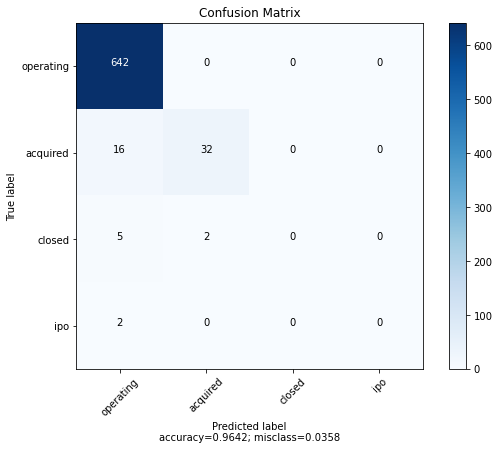

In [68]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, vot_predictions),
                      normalize    = False,
                      target_names = ['operating', 'acquired', 'closed', 'ipo'],
                      title        = "Confusion Matrix")

<a id='imp'></a>
# Feature Importance

In [69]:
feature_imp = pd.DataFrame({"Features": list(DF.columns),
                            "Importance": XGB_model.feature_importances_}
                            ).sort_values("Importance", ascending=False)
feature_imp

,Features,Importance
7,isClosed,0.907968
3,milestones,0.022310
4,relationships,0.012279
0,founded_at,0.012207
6,lng,0.008590
5,lat,0.008111
33,country_code_USA,0.005945
8,active_days,0.005616
22,category_code_web,0.005260
21,category_code_software,0.003442


### Visualizing Feature Importance

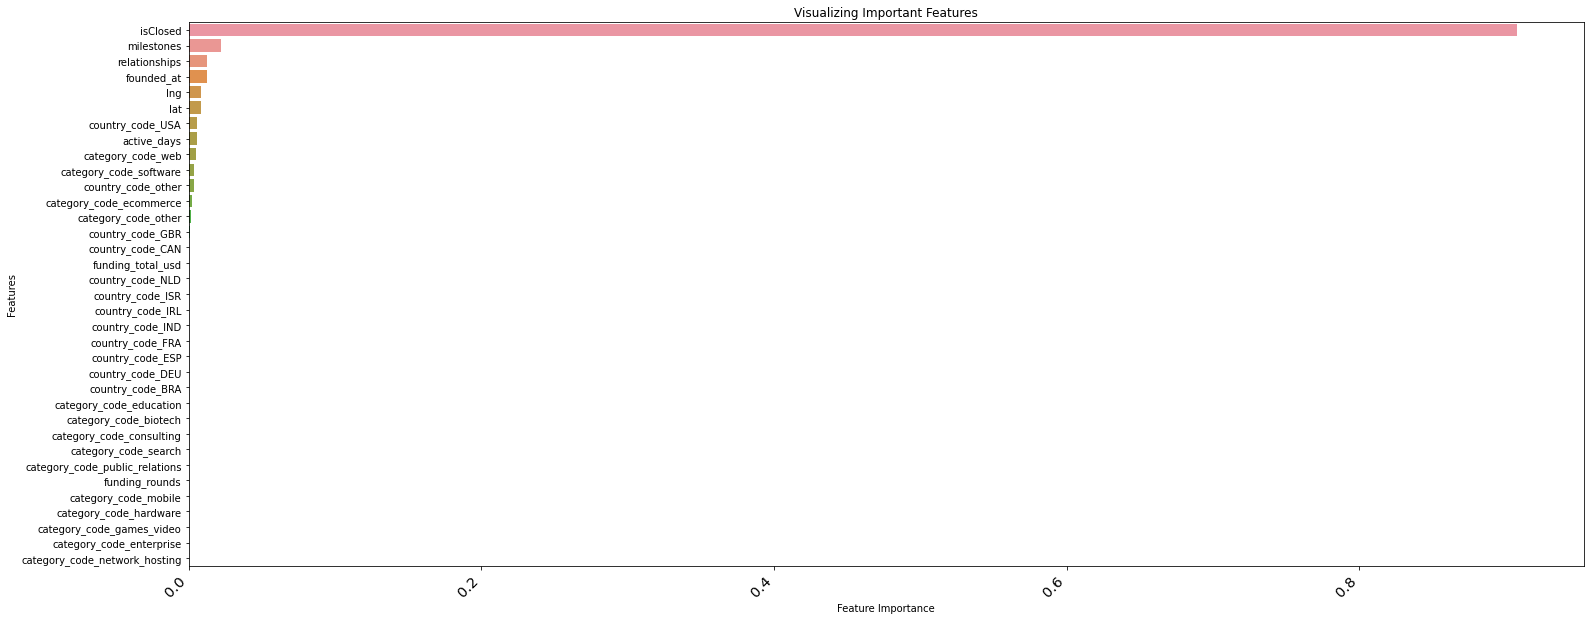

In [70]:
plt.figure(figsize=(25, 10))
sns.barplot(x=feature_imp.Importance,
            y=feature_imp.Features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(rotation=45,
           horizontalalignment="right", 
           fontweight="light", 
           fontsize="x-large")
plt.show()